In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pandas_datareader


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
stocks = ['INFY', 'TCS', 'SBI','JPPOWER.NS','JPINFRATEC.NS']
weights=np.array([0.2,0.2,0.2,0.2,0.2])
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,1,1)
data = yf.download(stocks, start=start, end=end)
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                              Close  \
                INFY JPINFRATEC.NS JPPOWER.NS       SBI       TCS  INFY   
Date                                                                      
2018-12-31  8.828543           NaN        NaN  7.473247  4.458913  9.52   
2019-01-01       NaN          3.90       2.10       NaN       NaN   NaN   
2019-01-02  8.912004          3.85       2.10  7.589597  4.627174  9.61   
2019-01-03  8.782174          3.85       2.10  7.598546  4.608478  9.47   
2019-01-04  8.930553          3.90       2.05  7.589597  4.786087  9.63   

                                                 ...  Open                \
           JPINFRATEC.NS JPPOWER.NS   SBI   TCS  ...  INFY JPINFRATEC.NS   
Date                                             ...                       
2018-12-31           NaN        NaN  8.35  4.77  ...  9.47           NaN   
2019-01-01          3.90       2.10   NaN   NaN  ...   NaN          3.80   
2019-01-02          3.85       2.10  8.48  4.95  ...  9.50          3.90   
2019-01-03          3.85       2.10  8.49  4.93  ...  9.55          3.85   
2019-01-04          3.90       2.05  8.48  5.12  ...  9.52          3.80   

                                      Volume                           \
           JPPOWER.NS   SBI   TCS       INFY JPINFRATEC.NS JPPOWER.NS   
Date                                                                    
2018-12-31        NaN  8.27  4.71  7229400.0           NaN        NaN   
2019-01-01       2.05   NaN   NaN        NaN      873313.0  5148897.0   
2019-01-02       2.15  8.33  4.72  9818900.0     1067493.0  2461363.0   
2019-01-03       2.05  8.44  4.92  9404900.0     1509882.0   709334.0   
2019-01-04       2.05  8.50  5.01  7119000.0     1805742.0   934430.0   

                                
                 SBI       TCS  
Date                            
2018-12-31  181800.0  456500.0  
2019-01-01       NaN       NaN  
2019-01-02   14900.0  272500.0  
2019-01-03   32900.0  256800.0  
2019-01-04   45500.0  217600.0  

[5 rows x 30 columns]

In [4]:
df=pd.DataFrame(data)['Close']
df.head()

  


,INFY,JPINFRATEC.NS,JPPOWER.NS,SBI,TCS
Date,,,,,
2018-12-31,9.52,NaN,NaN,8.35,4.77
2019-01-01,NaN,3.90,2.10,NaN,NaN
2019-01-02,9.61,3.85,2.10,8.48,4.95
2019-01-03,9.47,3.85,2.10,8.49,4.93
2019-01-04,9.63,3.90,2.05,8.48,5.12


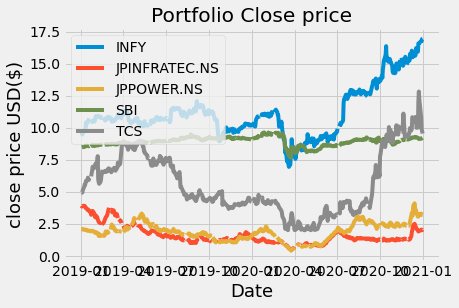

In [5]:
title='Portfolio Close price'
for i in df.columns.values:
    plt.plot(df[i],label=i)
    
plt.title (title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD($)',fontsize=18)
plt.legend(df.columns.values,loc='upper left')
plt.show()
    

In [6]:
returns=df.pct_change()
returns.head()

,INFY,JPINFRATEC.NS,JPPOWER.NS,SBI,TCS
Date,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN
2019-01-01,0.000000,NaN,NaN,0.000000,0.000000
2019-01-02,0.009454,-0.012821,0.00000,0.015569,0.037736
2019-01-03,-0.014568,0.000000,0.00000,0.001179,-0.004040
2019-01-04,0.016895,0.012987,-0.02381,-0.001178,0.038540


In [7]:
#annualised covariace matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,INFY,JPINFRATEC.NS,JPPOWER.NS,SBI,TCS
INFY,0.120478,0.006574,0.004640,0.015393,0.080028
JPINFRATEC.NS,0.006574,0.452559,0.205408,0.002726,-0.004325
JPPOWER.NS,0.004640,0.205408,0.526338,0.009913,-0.046473
SBI,0.015393,0.002726,0.009913,0.015386,0.015835
TCS,0.080028,-0.004325,-0.046473,0.015835,0.716254


In [8]:
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.0964182216232909

In [9]:
port_volatility=np.sqrt(port_variance)
port_volatility

0.3105128364871425

In [10]:
#annual portfolio return
portfoliosimpleannualreturn=np.sum(returns.mean()*weights)*252
portfoliosimpleannualreturn

0.2935573441971848

In [11]:
#expected annual return,volatality(risk),and variance
port_var=str(round(port_variance,2)*100)+ '%'
port_volat=str(round(port_volatility,2)*100)+ '%'
port_ret=str(round(portfoliosimpleannualreturn,2)*100)+'%'
print('Expected annual return: '+ port_ret)
print('Annual volatility/risk: '+ port_volat)
print('Annual variance: '+ port_var)

Expected annual return: 28.999999999999996%
Annual volatility/risk: 31.0%
Annual variance: 10.0%


In [12]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [13]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# PORTFOLIO OPTIMIZATION !

In [14]:
#Calculate the expected returns and annualised sample covraice matrix of asset return
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

In [15]:
# optimize for max Sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('INFY', 0.767), ('JPINFRATEC.NS', 0.0), ('JPPOWER.NS', 0.13329), ('SBI', 0.0), ('TCS', 0.09971)])
Expected annual return: 31.8%
Annual volatility: 31.5%
Sharpe Ratio: 0.95


(0.31815022496606515, 0.31512143663943476, 0.9461438997792199)

### This time we show that by using Sharpe ratio we got higher return than the previous one; 

In [16]:
!pip install cvxpy
!pip install cvxopt

In [17]:
#Get discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation ,get_latest_prices
latest_prices = get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value = 25000)

allocation, leftover = da.lp_portfolio()
print('Discre allocation:',allocation)
print('Funds remaining: ${: .2f}'.format(leftover))

Discre allocation: {'INFY': 1131, 'JPPOWER.NS': 1042, 'TCS': 261}
Funds remaining: $ 5.21
